In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
adf = pd.read_csv("airlines_flights_data.csv")
adf

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
adf.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
adf["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

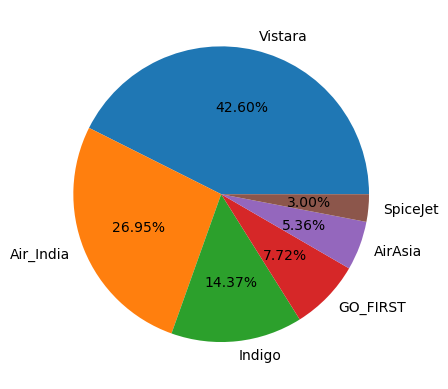

In [6]:
airline_values = adf["airline"].value_counts().values
airline_index = adf["airline"].value_counts().index
plt.pie(airline_values,labels= airline_index,autopct="%0.2f%%")
plt.show()

# Observation 
 vistara has most number of flight operations followed by air india, indigo ,gofirst,airasia,spice jet


In [7]:
adf["source_city"].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [8]:
adf["destination_city"].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [9]:
adf["Route"] = adf["source_city"]+" to "+adf["destination_city"]
adf.head(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Route
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai


In [10]:
adf["Route"].value_counts().reset_index()

,Route,count
0,Delhi to Mumbai,15289
1,Mumbai to Delhi,14809
2,Delhi to Bangalore,14012
3,Bangalore to Delhi,13756
4,Bangalore to Mumbai,12939
5,Mumbai to Bangalore,12885
6,Mumbai to Kolkata,12602
7,Delhi to Kolkata,11934
8,Kolkata to Mumbai,11467
9,Delhi to Chennai,10780


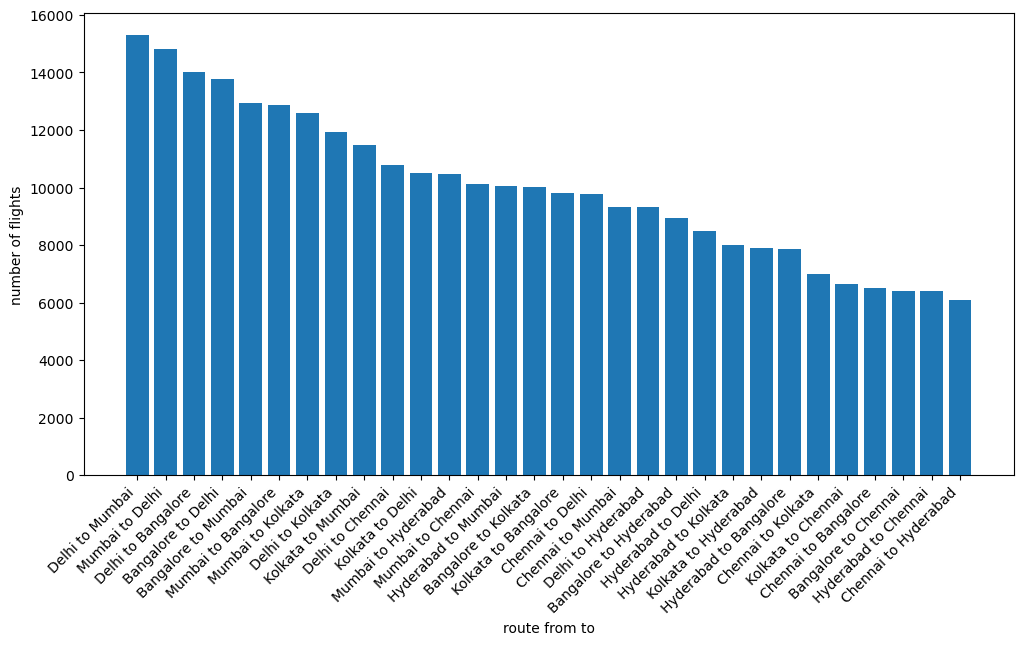

In [11]:
plt.rcParams["figure.figsize"]=(12,6)
plt.bar(adf["Route"].value_counts().index,adf["Route"].value_counts().values)
plt.xlabel("route from to")
plt.ylabel("number of flights")
plt.xticks(rotation = 45 ,ha = "right")
plt.show()

most number of flights are between delhi to mumbai and least between chennai to hyderabad

In [12]:
adf.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'Route'],
      dtype='object')

In [13]:
adf["departure_time"].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

1. color code for each 
2. flight timing graph 

In [14]:
adf["arrival_time"].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [15]:
adf["flight timings"] = adf["departure_time"]+" to "+adf["arrival_time"]
adf

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Route,flight timings
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai,Evening to Night
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai,Early_Morning to Morning
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai,Early_Morning to Early_Morning
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai,Morning to Afternoon
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai,Morning to Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai to Hyderabad,Morning to Evening
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai to Hyderabad,Afternoon to Night
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai to Hyderabad,Early_Morning to Night
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai to Hyderabad,Early_Morning to Evening


In [16]:
adf

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Route,flight timings
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai,Evening to Night
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai,Early_Morning to Morning
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai,Early_Morning to Early_Morning
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai,Morning to Afternoon
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai,Morning to Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai to Hyderabad,Morning to Evening
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai to Hyderabad,Afternoon to Night
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai to Hyderabad,Early_Morning to Night
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai to Hyderabad,Early_Morning to Evening


In [17]:
adf["flight timings"].value_counts()

flight timings
Morning to Evening                24289
Morning to Night                  23680
Afternoon to Night                20915
Evening to Night                  18924
Early_Morning to Evening          18866
Early_Morning to Night            18161
Evening to Morning                17498
Night to Morning                  16076
Early_Morning to Morning          13343
Evening to Evening                13003
Afternoon to Evening              12862
Early_Morning to Afternoon        12435
Morning to Afternoon              10624
Night to Night                     9752
Morning to Morning                 9509
Night to Evening                   9209
Afternoon to Morning               5914
Night to Afternoon                 5777
Evening to Late_Night              5644
Evening to Afternoon               5407
Evening to Early_Morning           4626
Night to Early_Morning             4223
Afternoon to Afternoon             3823
Early_Morning to Early_Morning     3185
Afternoon to Late_Night  

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Morning to Evening'),
  Text(1, 0, 'Morning to Night'),
  Text(2, 0, 'Afternoon to Night'),
  Text(3, 0, 'Evening to Night'),
  Text(4, 0, 'Early_Morning to Evening'),
  Text(5, 0, 'Early_Morning to Night'),
  Text(6, 0, 'Evening to Morning'),
  Text(7, 0, 'Night to Morning'),
  Text(8, 0, 'Early_Morning to Morning'),
  Text(9, 0, 'Evening to Evening'),
  Text(10, 0, 'Afternoon to Evening'),
  Text(11, 0, 'Early_Morning to Afternoon'),
  Text(12, 0, 'Morning to Afternoon'),
  Text(13, 0, 'Night to Night'),
  Text(14, 0, 'Morning to Morning'),
  Text(15, 0, 'Night to Evening'),
  Text(16, 0, 'Afternoon to Morning'),
  Text(17, 0, 'Night to Afternoon'),
  Text(18, 0, 'Evening to Late_Night'),
  Text(19, 0, 'Evening to Afternoon'),
  Text(20, 0, 'Evening to Early_Morning'

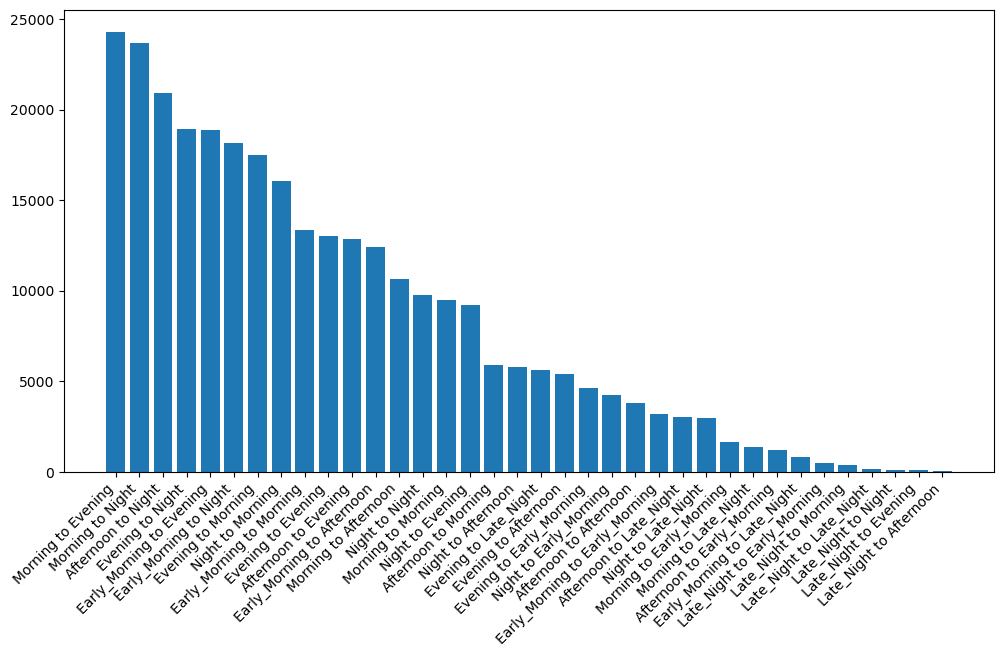

In [18]:
plt.bar(adf["flight timings"].value_counts().index,adf["flight timings"].value_counts().values)
plt.xticks(rotation = 45,ha="right")

<BarContainer object of 6 artists>

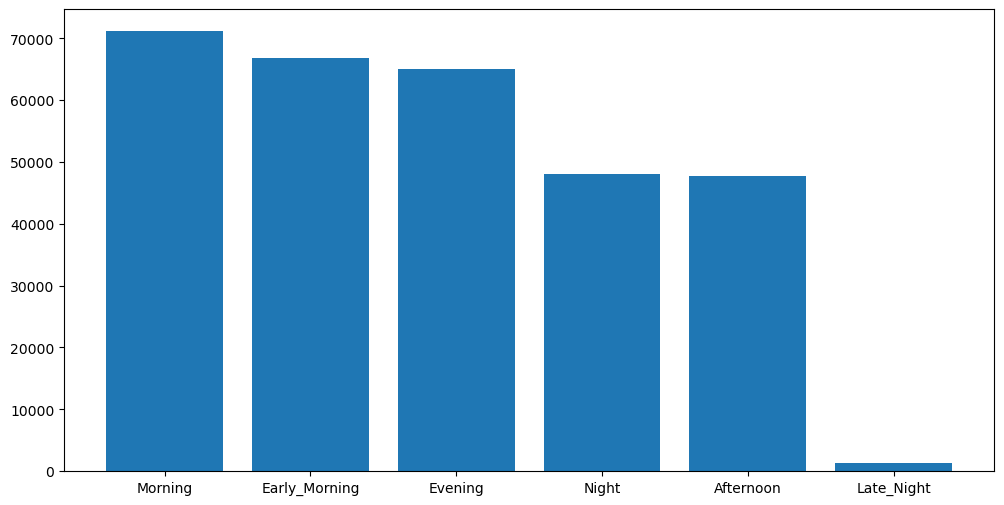

In [19]:
plt.bar(adf["departure_time"].value_counts().index,adf["departure_time"].value_counts().values)

<BarContainer object of 6 artists>

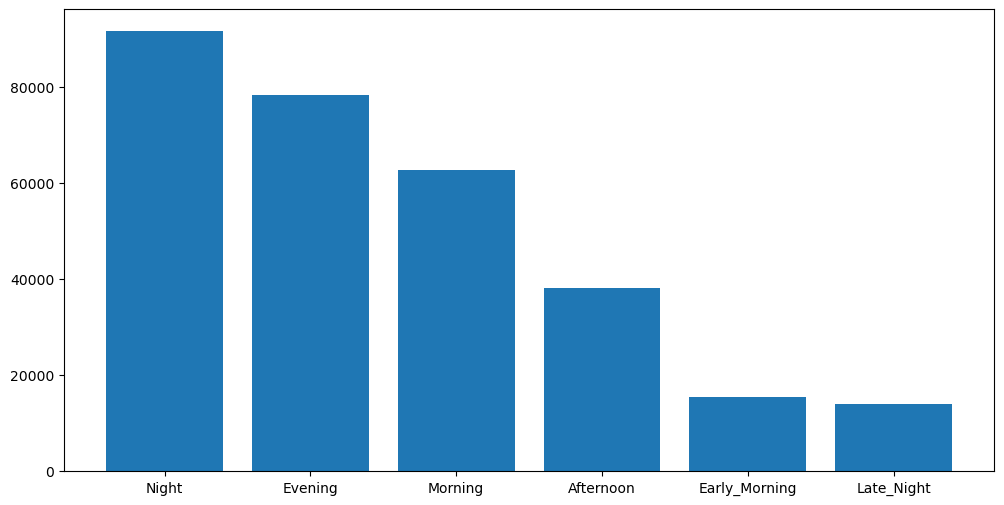

In [20]:
plt.bar(adf["arrival_time"].value_counts().index,adf["arrival_time"].value_counts().values)

In [21]:
timdf = pd.DataFrame({"departure":adf["departure_time"].value_counts().sort_index(),
                     "arrival":adf["arrival_time"].value_counts().sort_index()})
timdf

,departure,arrival
Afternoon,47794,38139
Early_Morning,66790,15417
Evening,65102,78323
Late_Night,1306,14001
Morning,71146,62735
Night,48015,91538


In [22]:
time_order = [
    'Early_Morning', 
    'Morning', 
    'Afternoon', 
    'Evening', 
    'Night', 
    'Late_Night'
]
timdf = timdf.reindex(time_order)
timdf

,departure,arrival
Early_Morning,66790,15417
Morning,71146,62735
Afternoon,47794,38139
Evening,65102,78323
Night,48015,91538
Late_Night,1306,14001


<Axes: >

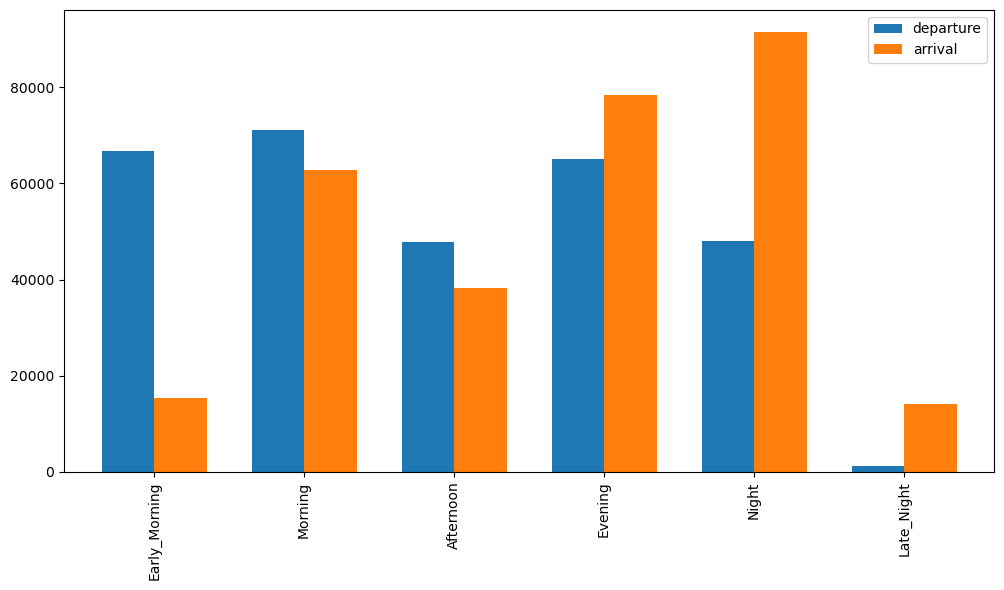

In [23]:
timdf.plot(kind="bar",figsize=(12,6),width = 0.7)


# observation
1. from early morning to afternoon departure is more arrival is less
2. from evening to late night arrival is more than departure 
3. during late night the activity is very less
4. in early morning and late nignt the activity in arrival is almost same 

In [24]:
adf["stops"].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [25]:
adf["stops"].replace(["one","zero","two_or_more"],[1,0,2],inplace=True)
adf.head(5)

C:\Users\hp\AppData\Local\Temp\ipykernel_24668\2853123457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adf["stops"].replace(["one","zero","two_or_more"],[1,0,2],inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_24668\2853123457.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adf["sto

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Route,flight timings
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai,Evening to Night
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai,Early_Morning to Morning
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai,Early_Morning to Early_Morning
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai,Morning to Afternoon
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai,Morning to Morning


In [26]:
adf[["airline","duration","price","stops"]].reset_index()

,index,airline,duration,price,stops
0,0,SpiceJet,2.17,5953,0
1,1,SpiceJet,2.33,5953,0
2,2,AirAsia,2.17,5956,0
3,3,Vistara,2.25,5955,0
4,4,Vistara,2.33,5955,0
...,...,...,...,...,...
300148,300148,Vistara,10.08,69265,1
300149,300149,Vistara,10.42,77105,1
300150,300150,Vistara,13.83,79099,1
300151,300151,Vistara,10.00,81585,1


In [27]:
adf.groupby("airline")["duration"].mean().sort_values(ascending=False)

airline
Air_India    15.504235
Vistara      13.326634
SpiceJet     12.579767
AirAsia       8.941714
GO_FIRST      8.755380
Indigo        5.795197
Name: duration, dtype: float64

In [28]:
adf["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [29]:
adf.groupby(["airline","class"]).size().unstack(fill_value=" ")

class,Business,Economy
airline,,
AirAsia,,16098
Air_India,32898,47994
GO_FIRST,,23173
Indigo,,43120
SpiceJet,,9011
Vistara,60589,67270


according to the data set only air india and vistara has both business and economy class seats and other airlines only have economy seats 